Parker Pschorr

801004564

3/16/2023

ECGR 4105

Homework 2

Problem 3

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
import seaborn as sns

In [2]:
#Importing data from the csv file
breast = load_breast_cancer()
X = breast.data
print(X.shape)
Y = breast.target
print(Y.shape)

(569, 30)
(569,)


In [3]:
breast_input = pd.DataFrame(X)
breast_input.head() # To get first n rows from the dataset default value of n is 5

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Standardization of input data
X = StandardScaler().fit_transform(X)
print(X[:1])

[[ 1.09706398 -2.07333501  1.26993369  0.9843749   1.56846633  3.28351467
   2.65287398  2.53247522  2.21751501  2.25574689  2.48973393 -0.56526506
   2.83303087  2.48757756 -0.21400165  1.31686157  0.72402616  0.66081994
   1.14875667  0.90708308  1.88668963 -1.35929347  2.30360062  2.00123749
   1.30768627  2.61666502  2.10952635  2.29607613  2.75062224  1.93701461]]


In [5]:
# Splitting data into training and validation sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = None)

In [6]:
# Performing logistic regression
# Note that the penalty and C arguments have been added to enable an L1 weight penalty
classifier = LogisticRegression(penalty='l1', C=1, solver = 'liblinear', random_state = None)
# Fitting model to training data
classifier.fit(X_train, Y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [7]:
# Creating a prediction array
Y_pred = classifier.predict(X_test)
Y_pred[0:29]

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0])

In [8]:
# Determining the accuracy, precision, and recall of the model
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.9473684210526315
Precision: 0.9393939393939394
Recall: 0.96875


In [9]:
# Creating a confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[46,  4],
       [ 2, 62]])

Text(0.5, 257.44, 'Predicted outcome')

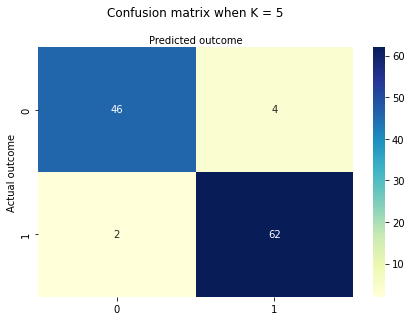

In [10]:
# Plotting the confusion matrix using a heatmap
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Creating a heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix when K = 5', y=1.1)
plt.ylabel('Actual outcome')
plt.xlabel('Predicted outcome')